## Room Cleanliness Classifier via Image Classification using Logistic Regression(sklearn), K-NN, SVM, Random Forest Classifier and Convolutional Neural Network using Keras API 

Import Requirements

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
import os 
import pickle

Setting Paths

In [2]:
train_messy_path = "../dataset/images/train/messy"
train_clean_path = "../dataset/images/train/clean"
val_messy_path = "../dataset/images/val/messy"
val_clean_path = "../dataset/images/val/clean"

Deciding Image size and Classes

In [3]:
IMG_SZ=64
Classes = ["Messy","Clean"]

Creating function for data

In [4]:
def data(messy_path,clean_path):
    data_messy = [] 
    data_clean=[]
    for image in os.listdir(messy_path): 
        path = os.path.join(messy_path, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (IMG_SZ,IMG_SZ))
        data_messy.append(img) 
    for image in os.listdir(clean_path): 
        path = os.path.join(clean_path, image)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img = cv2.resize(img, (IMG_SZ,IMG_SZ))
        data_clean.append(img) 
    data_result = np.concatenate((np.asarray(data_messy),np.asarray(data_clean)),axis=0)
    return data_result

Building training set and validation set

In [5]:
train_data = data(train_messy_path,train_clean_path) 
val_data = data(val_messy_path,val_clean_path)

Merging training set and validation set

In [6]:
x_data = np.concatenate((train_data,val_data),axis=0)

Normalization

In [7]:
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

Creating Labels

In [8]:
train_label_0 = np.zeros(len(os.listdir(train_messy_path)))
train_label_1 = np.ones(len(os.listdir(train_clean_path)))
Y_train = np.concatenate((train_label_0, train_label_1), axis=0)
val_label_0 = np.zeros(len(os.listdir(val_messy_path)))
val_label_1 = np.ones(len(os.listdir(val_messy_path)))
Y_val = np.concatenate((val_label_0, val_label_1), axis=0)

In [9]:
y_data=np.concatenate((Y_train,Y_val),axis=0).reshape(x_data.shape[0],1)

Creating new unbiased splits randomly

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15,random_state=0)
num_of_train = x_train.shape[0]
num_of_test = x_test.shape[0]
print(x_train.shape,y_train.shape)
print(x_train[1])
x_train_temp,y_train_temp=x_train,y_train
x_test_temp,y_test_temp=x_test,y_test
test_image=x_test[1]

(180, 64, 64) (180, 1)
[[ 0.67843137  0.69019608  0.69019608 ...,  0.76862745  0.76470588
   0.76470588]
 [ 0.6627451   0.67058824  0.67843137 ...,  0.77254902  0.76862745
   0.76862745]
 [ 0.65882353  0.6627451   0.66666667 ...,  0.77647059  0.77647059
   0.77647059]
 ..., 
 [ 0.42352941  0.42745098  0.43529412 ...,  0.49019608  0.52941176
   0.54509804]
 [ 0.4         0.39215686  0.40392157 ...,  0.56078431  0.53333333
   0.57254902]
 [ 0.42745098  0.44313725  0.43137255 ...,  0.55294118  0.49803922
   0.56862745]]


Reshaping image data and flattening

In [11]:
x_train = x_train.reshape(num_of_train,x_train.shape[1]*x_train.shape[2])
x_test = x_test .reshape(num_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train.shape)
print("X test flatten",x_test.shape)


X train flatten (180, 4096)
X test flatten (32, 4096)


**Training using sklearn**

Logistic Regression (sklearn)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((180, 4096), (180, 1), (32, 4096), (32, 1))

In [15]:
model.fit(x_train, y_train)

C:\Users\Arjun Singh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
model.score(x_test, y_test)

0.5625

In [17]:
y_pred = model.predict(x_test[:len(x_test)])
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 5 11]
 [ 3 13]]


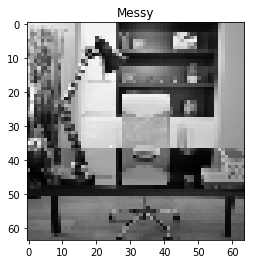

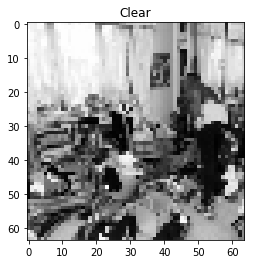

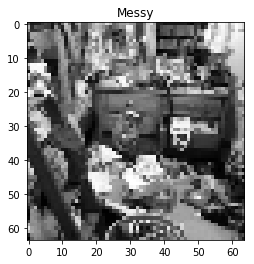

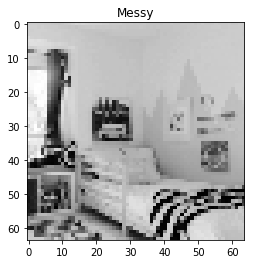

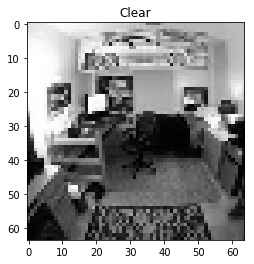

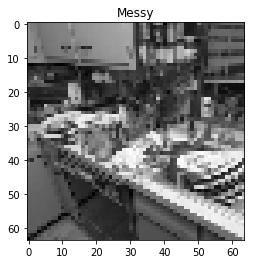

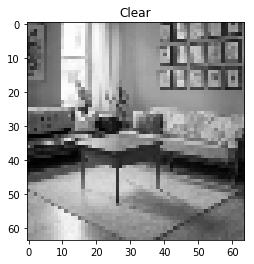

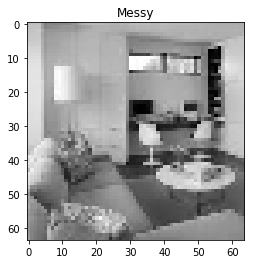

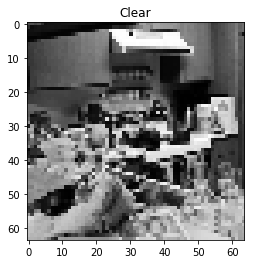

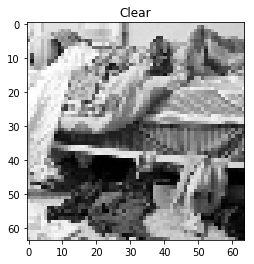

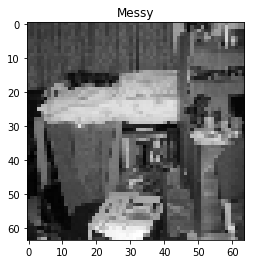

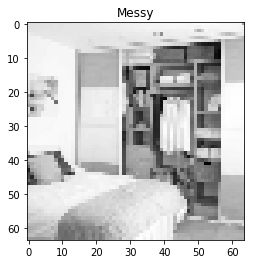

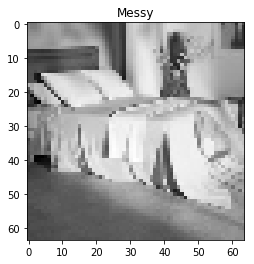

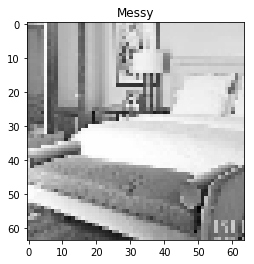

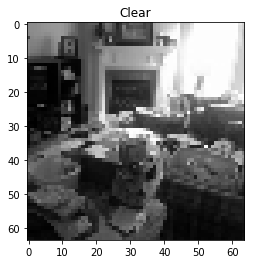

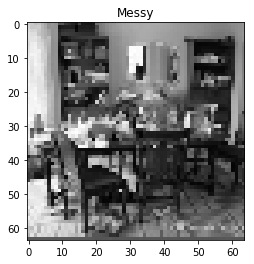

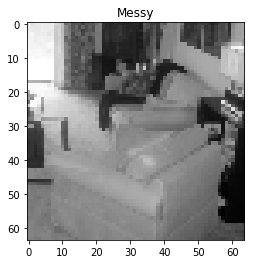

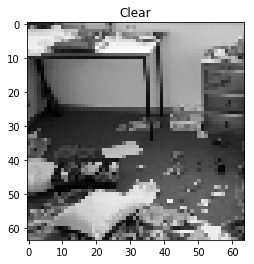

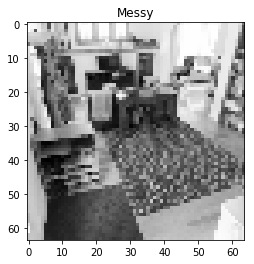

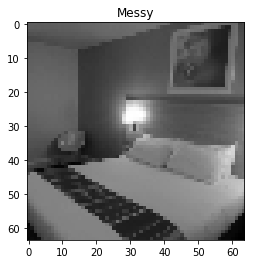

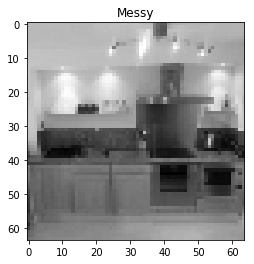

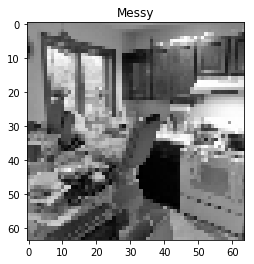

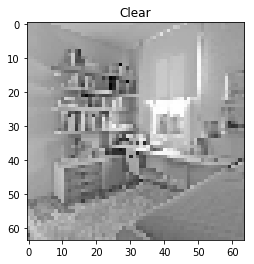

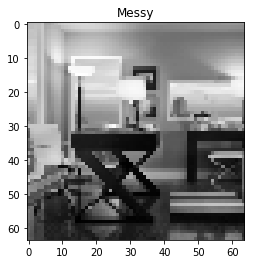

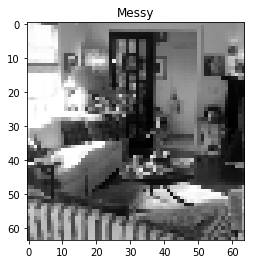

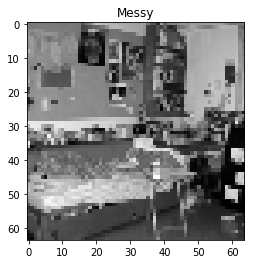

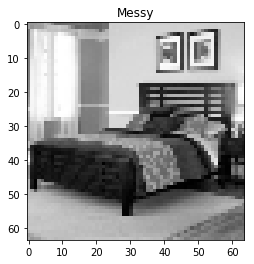

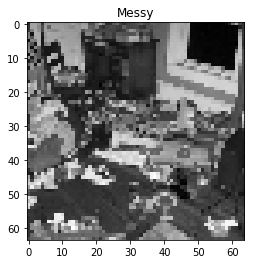

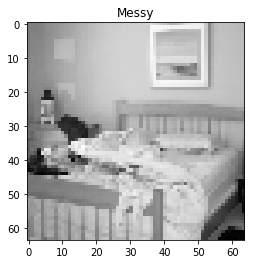

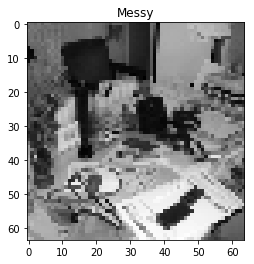

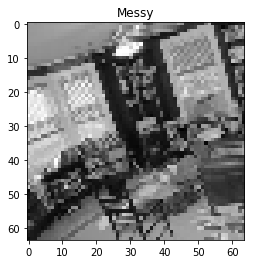

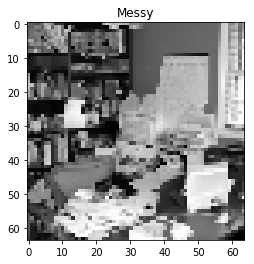

In [18]:
ans = model.predict(x_test[:len(x_test)])

ans = list(map(lambda x: "Messy" if x else "Clear",ans))

for i in range(len(ans)):
	plt.imshow(x_test[i].reshape(IMG_SZ,IMG_SZ),cmap='gray')
	plt.title(ans[i])
	plt.show()

Saving the model

In [19]:
pickle.dump(model, open('model.pkl','wb'))

K Nearest Neighbors (sklearn)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 3 13]
 [ 2 14]]


C:\Users\Arjun Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Support Vector Classifier (sklearn)

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

C:\Users\Arjun Singh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[12  4]
 [ 4 12]]


Suppot Vector Classifier (Kernel trick)

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

C:\Users\Arjun Singh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[14  2]
 [ 4 12]]


Random Forest Classifier (sklearn)

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[14  2]
 [ 5 11]]


C:\Users\Arjun Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Loading the saved model

In [24]:
model_loaded = pickle.load(open('model.pkl','rb'))

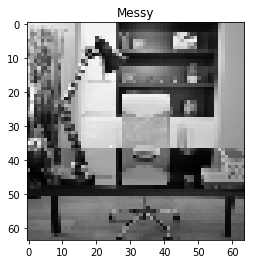

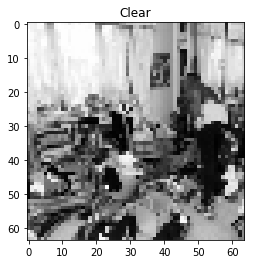

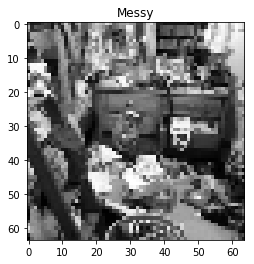

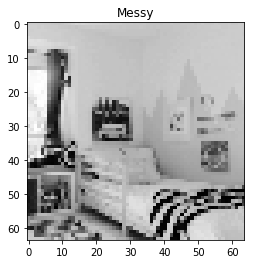

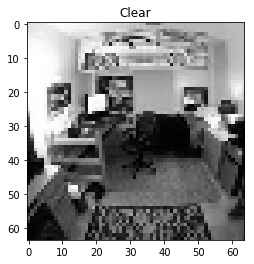

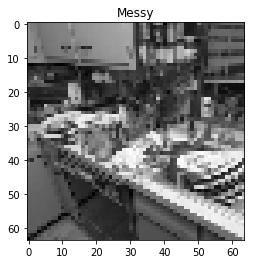

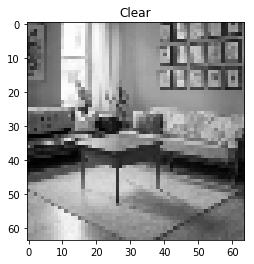

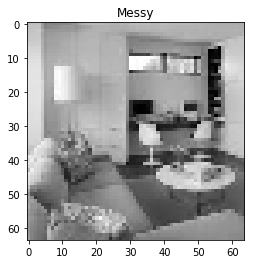

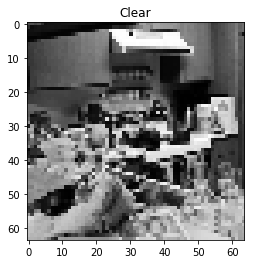

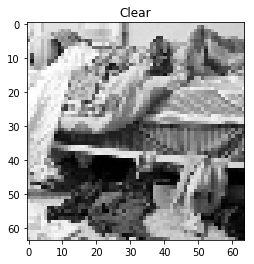

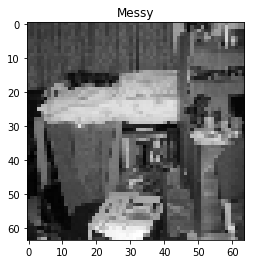

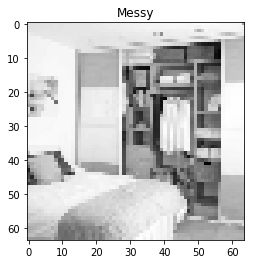

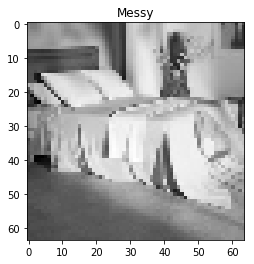

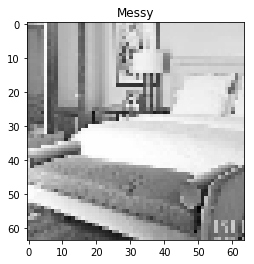

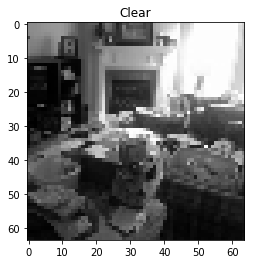

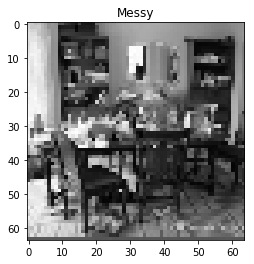

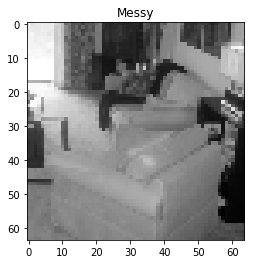

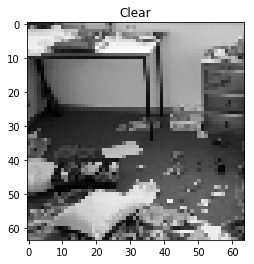

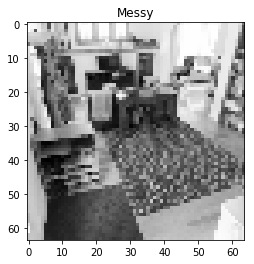

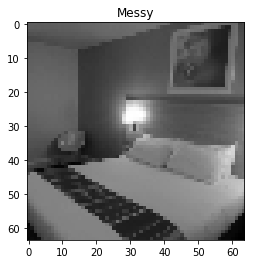

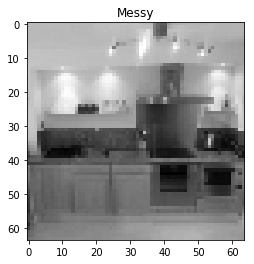

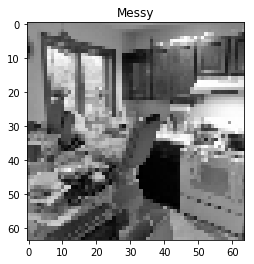

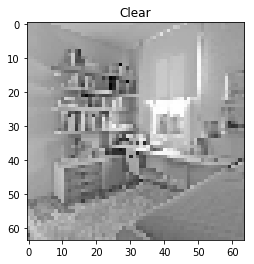

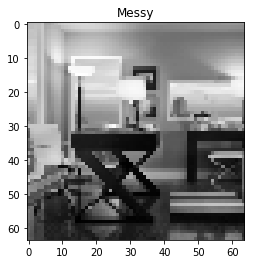

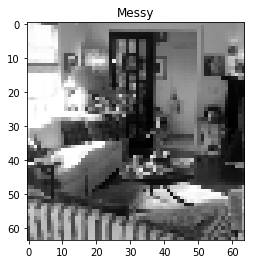

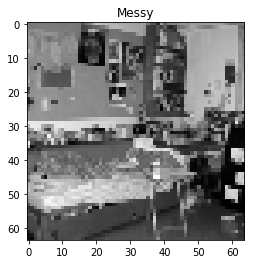

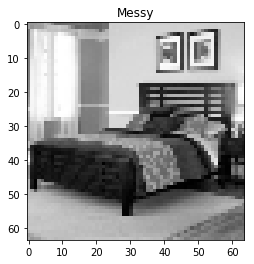

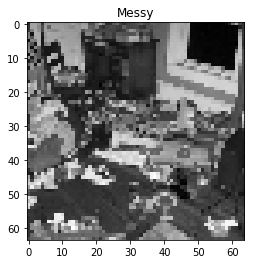

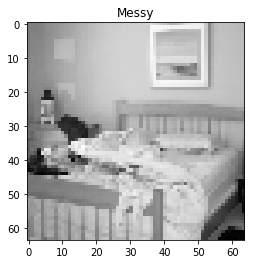

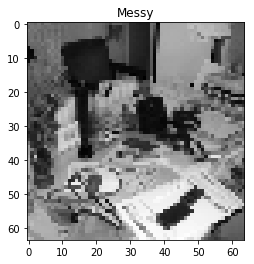

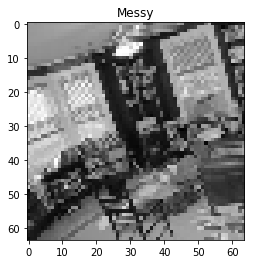

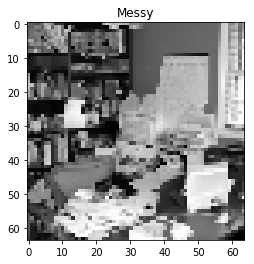

In [25]:
ans = model_loaded.predict(x_test[:len(x_test)])

ans = list(map(lambda x: "Messy" if x else "Clear",ans))

for i in range(len(ans)):
	plt.imshow(x_test[i].reshape(IMG_SZ,IMG_SZ),cmap='gray')
	plt.title(ans[i])
	plt.show()

# Deep Learning ConvNet model

In [26]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

1.13.1


Generating traing and test set

In [27]:
x_train,y_train=x_train_temp,y_train_temp
x_train=np.array(x_train).reshape(-1,IMG_SZ,IMG_SZ,1)
x_test,y_test=x_test_temp,y_test_temp
x_test=np.array(x_test).reshape(-1,IMG_SZ,IMG_SZ,1)

Building and training the Sequencial model of Keras

In [28]:
modelConv = Sequential()
modelConv.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:]))
modelConv.add(Activation("relu"))
modelConv.add(MaxPooling2D(pool_size=(2,2)))

modelConv.add(Conv2D(64,(3,3)))
modelConv.add(Activation("relu"))
modelConv.add(MaxPooling2D(pool_size=(2,2)))

modelConv.add(Flatten())
modelConv.add(Dense(64))

modelConv.add(Dense(1))
modelConv.add(Activation('sigmoid'))

modelConv.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

modelConv.fit(x_train,y_train,batch_size=8,epochs=5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
180/180 [==============================] - 3s 16ms/sample - loss: 0.7383 - acc: 0.6222
Epoch 2/5
180/180 [==============================] - 3s 15ms/sample - loss: 0.5878 - acc: 0.7278
Epoch 3/5
180/180 [==============================] - 3s 15ms/sample - loss: 0.4492 - acc: 0.7833
Epoch 4/5
180/180 [==============================] - 3s 15ms/sample - loss: 0.4882 - acc: 0.7667
Epoch 5/5
180/180 [==============================] - 3s 15ms/sample - loss: 0.4104 - acc: 0.8111


Evaluating test set

In [29]:
modelConv.evaluate(x_test,y_test,verbose=2)

 - 0s - loss: 0.4935 - acc: 0.7812


[0.49345561861991882, 0.78125]

Predicting

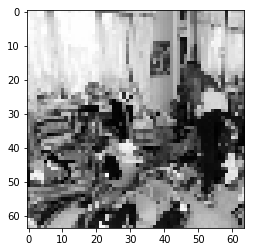

(1, 64, 64, 1)
[[ 0.01399852]]
Verdict:  Messy


In [30]:
plt.imshow(test_image.reshape(IMG_SZ,IMG_SZ),cmap='gray')
plt.show()
test_image = np.array(test_image).reshape(-1,IMG_SZ,IMG_SZ,1)
print(test_image.shape)
predictions = modelConv.predict([test_image])
print(predictions)
messy_clean=0
if(predictions[0]>0.5):
    messy_clean=1
print("Verdict: ",Classes[messy_clean])

Saving model

In [31]:
pickle.dump(model, open('modelConv.pkl','wb'))

That's all for the Model building. Next Comes the Deployment. 